<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Entropy</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">Entropy is the information density in a signal. </p>
<p style="padding-left:20px;padding-right:20px;">It is calculated by multiplying each sign's probability by the logarithm of the probability and summing it up for all signs. </p>
<p style="padding-left:20px;padding-right:20px;">If we use log2, the unit is bits, if we use ln, the unit is nats.</p>
</div>

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import string

In [166]:
# Get the book The time machine by H. G. Wells
url = 'https://www.gutenberg.org/files/35/35-0.txt'
text = requests.get(url).text
print(type(text))
print(len(text))

<class 'str'>
204357


In [167]:
text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [168]:
# Remove formatting characters
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
]

for character in strings2replace:
    text = text.replace(character, ' ')

In [169]:
text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks

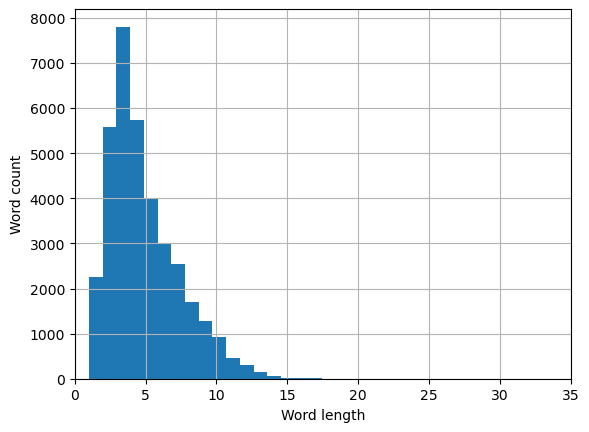

In [170]:
# Compute the word length distribution
words = text.split()
lengths = np.array([len(word) for word in words])

plt.hist(lengths, bins=np.max(lengths))
plt.ylabel('Word count')
plt.xlabel('Word length')
plt.xlim([0, 5 + (np.max(lengths)//5)*5])
plt.grid(c=[.7, .7, .7])
plt.show()

In [171]:
# Compute letter frequency
alphabet = string.ascii_lowercase
letterFrequencies = {}

def putLetter(letter):
    letter = letter.lower()
    if not letter in alphabet:
        return
    letterFrequencies[letter] = letterFrequencies[letter] + 1

def putWord(word):
    for letter in word:
        putLetter(letter)

for letter in alphabet:
    letterFrequencies[letter] = 0

[putWord(word) for word in words]
letterFrequencies

{'a': 12752,
 'b': 2171,
 'c': 4049,
 'd': 6868,
 'e': 19781,
 'f': 3749,
 'g': 3512,
 'h': 8841,
 'i': 11312,
 'j': 187,
 'k': 1231,
 'l': 6658,
 'm': 4420,
 'n': 11012,
 'o': 11157,
 'p': 2867,
 'q': 106,
 'r': 8895,
 's': 9313,
 't': 15155,
 'u': 4328,
 'v': 1435,
 'w': 3524,
 'x': 282,
 'y': 3024,
 'z': 108}

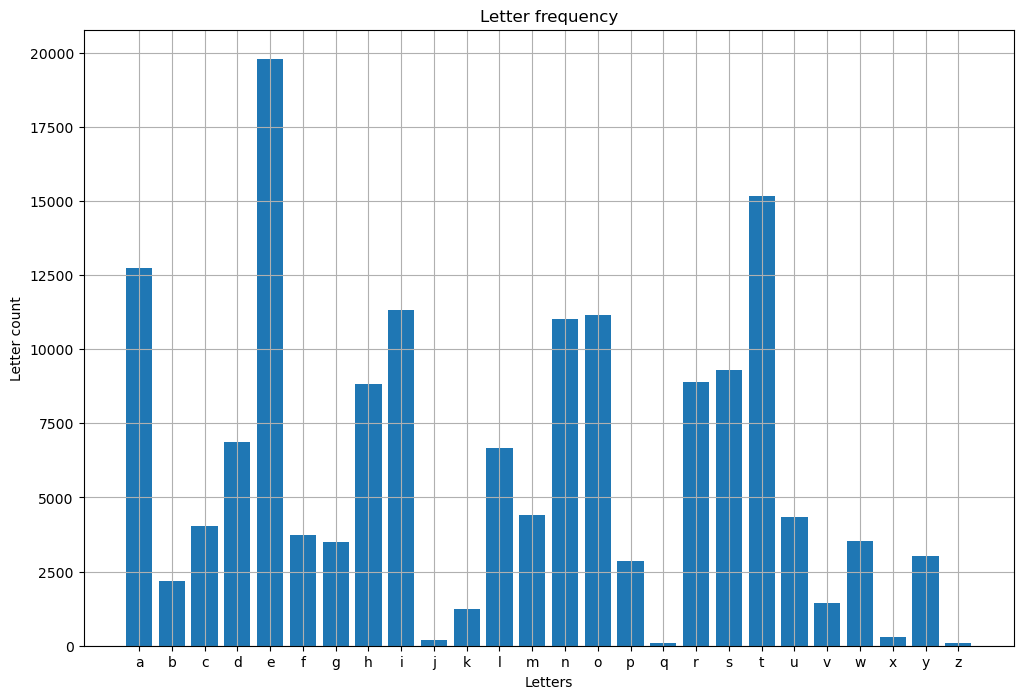

In [172]:
plt.figure(figsize=(12,8))
plt.bar(letterFrequencies.keys(), letterFrequencies.values())
plt.xlabel('Letters')
plt.ylabel('Letter count')
plt.title('Letter frequency')
plt.grid()
plt.show()

In [173]:
# Compute the entropy of letters
def entropy(p):
    return p * np.log2(p + np.finfo(float).eps) # bits

def entropies(probabilities):
    return -1 * sum([entropy(p) for p in probabilities])

letterOccurrances = list(letterFrequencies.values())
allLetters = sum(letterOccurrances)
probabilities = [o / allLetters for o in letterOccurrances]

print('Entropy of the text is %.3f'%entropies(probabilities))
print('-----------------------------')
print('For sanity check: Sum of probabilities is %.6f'%sum(probabilities))

Entropy of the text is 4.173
-----------------------------
For sanity check: Sum of probabilities is 1.000000


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Conditional entropy</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">So far we have treated every letter as an independent event, that has nothing to do with the other letters, which is not true. To address this issue, we need conditional entropy. </p>
</div>

In [174]:
probmat = np.zeros((26, 26)) # probability matrix

for i in range(len(text)-1):
    currentLetter = text[i].lower()
    nextLetter = text[i + 1].lower()
    if currentLetter in alphabet and nextLetter in alphabet:
        row = alphabet.index(currentLetter)
        column = alphabet.index(nextLetter)
        probmat[row, column] += 1


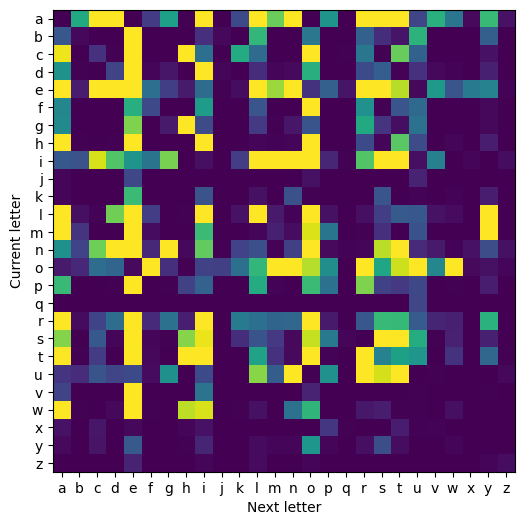

In [175]:
fig,ax = plt.subplots(1,figsize=(6,6))
ax.imshow(probmat,vmax=500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(26))
ax.set_yticks(range(26))
ax.set_xticklabels(alphabet)
ax.set_yticklabels(alphabet)

plt.show()

In [176]:
# Compute conditional entropy
condEntropies = np.zeros(26)
for i in range(26):
    probs = probmat[i,:] # i-th row, all columns
    probs = probs / sum(probs)
    condEntropies[i] = entropies(probs)

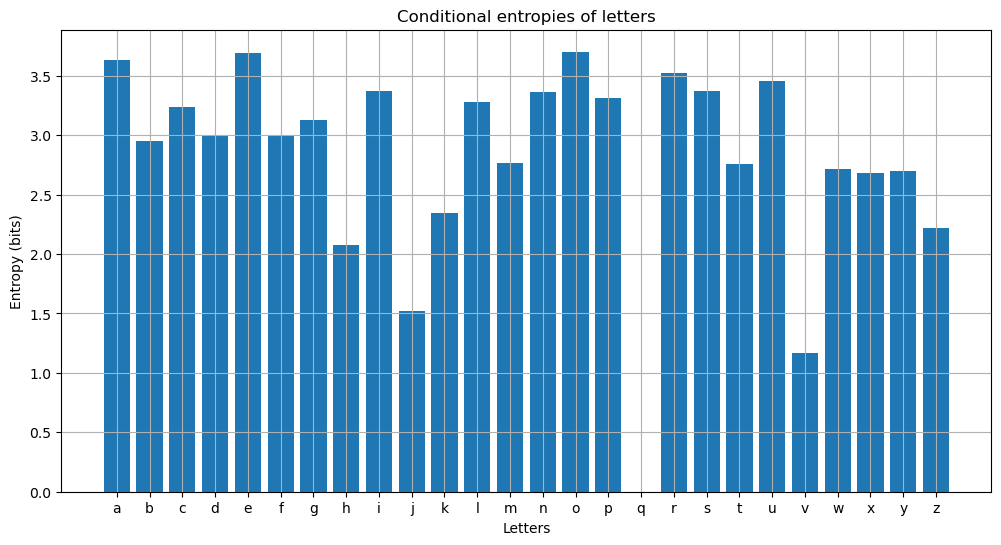

In [177]:
fig,ax = plt.subplots(1,figsize=(12, 6))
ax.bar(range(26), condEntropies)
ax.set_xticks(range(26))
ax.set_xticklabels(alphabet)
ax.set_xlabel('Letters')
ax.set_ylabel('Entropy (bits)')
ax.set_title('Conditional entropies of letters')
ax.grid()
plt.show()